In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Accesing Data

### Download data using the pandas from the first table on the webpage

In [142]:
# Define the URL where the table is located
url = "https://www.health.harvard.edu/diseases-and-conditions/glycemic-index-and-glycemic-load-for-100-foods"

# Use Pandas to read the table from the website
tables = pd.read_html(url)

# Select the first table (which contains the glycemic index values)
gi_table = tables[0]

# Rename the columns to more descriptive names
gi_table.columns = ["Food", "Glycemic Index"]

# Create a new "Category" column based on the subheading in the original table
categories = []
current_category = ""
for food in gi_table["Food"].astype(str):
    if "HIGH-CARBOHYDRATE FOODS" in food:
        current_category = "HIGH-CARB FOOD"
    elif "BREAKFAST CEREALS" in food:
        current_category = "BREAKFAST CEREALS"
    elif "FRUIT AND FRUIT PRODUCTS" in food:
        current_category = "FRUIT AND FRUIT PRODUCTS"
    elif "VEGETABLES" in food:
        current_category = "VEGETABLES"
    elif "DAIRY PRODUCTS AND ALTERNATIVES" in food:
        current_category = "DAIRY PRODUCTS AND ALTERNATIVES"
    elif "LEGUMES" in food:
        current_category = "LEGUMS"
    elif "SNACK PRODUCTS" in food:
        current_category = "SNACK PRODUCTS"
    elif "SUGARS" in food:
        current_category = "SUGARS"

    categories.append(current_category)
gi_table["Category"] = categories


# create a data frame in Pandas to store the downlaoded data
df = pd.DataFrame(gi_table)
df_csv = pd.DataFrame(gi_table)

### Data Cleaning by resetting Index, delete the rows which dont have Glycemic Index, Delete first and last row 

In [143]:
# Set Index of the data Frame
df.reset_index(drop=True, inplace=True)

In [144]:
# drop rows where 'Glycemic Index' column has NaN values
df = df.dropna(subset=['Glycemic Index'])

In [145]:
# drop first row of the data dataframe
df = df.drop([0])

In [146]:
# drop last row of the dataframe
df = df.drop(df.index[-1])

### introduce a new cloumn gi. gi has base of the range provided in Glycemic Index column e.g 75 ± 3 gives gi of 75

In [147]:

# extract the numeric value from 'Glycemic Index' column and convert it to integer and save it in new cloumn 'gi'
df['gi'] = df['Glycemic Index'].apply(lambda x: int(x.split('±')[0]))

## Creating Plots

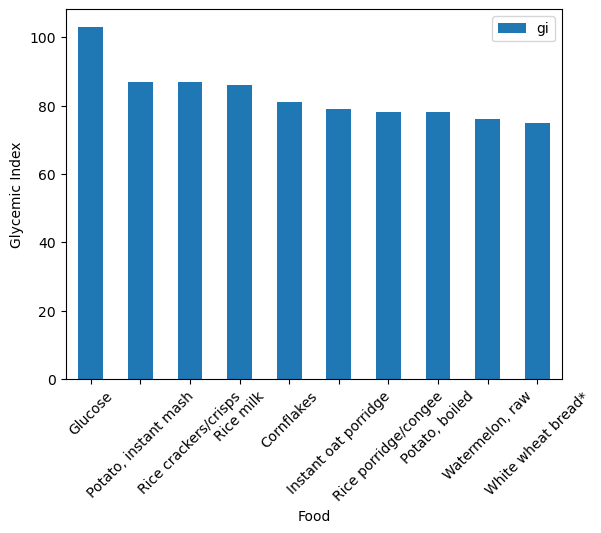

In [148]:
# pick 10 foods with largest gi
top_10_foods = df.nlargest(10, 'gi')

ax = top_10_foods.plot.bar(x='Food', y='gi', rot=0)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

ax.set_xlabel("Food")
ax.set_ylabel("Glycemic Index")
plt.show()

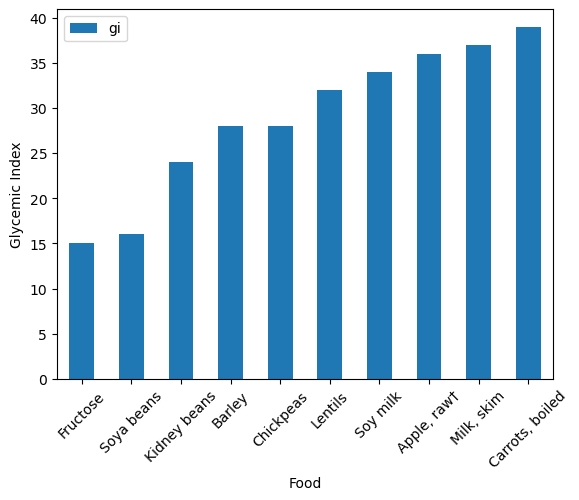

In [149]:
# pick 10 foods with smallest gi
bottom_10_foods = df.nsmallest(10, 'gi')

ax = bottom_10_foods.plot.bar(x='Food', y='gi', rot=0)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)


ax.set_xlabel("Food")
ax.set_ylabel("Glycemic Index")
plt.show()

In [200]:
# Create a new DataFrame with only the Fruit and gi columns
fruit_gi_df = df.loc[df['Category'] ==
                     'FRUIT AND FRUIT PRODUCTS', ['Food', 'gi']]


In [151]:
# Sort the DataFrame in ascending order by gi to get the bottom 3 fruits
bottom_2_fruits = fruit_gi_df.sort_values('gi', ascending=True).head(2)

# Sort the DataFrame in descending order by gi to get the top 3 fruits
top_2_fruits = fruit_gi_df.sort_values('gi', ascending=False).head(2)

top_2_fruits

,Food,gi
34,"Watermelon, raw",76
32,"Pineapple, raw",59


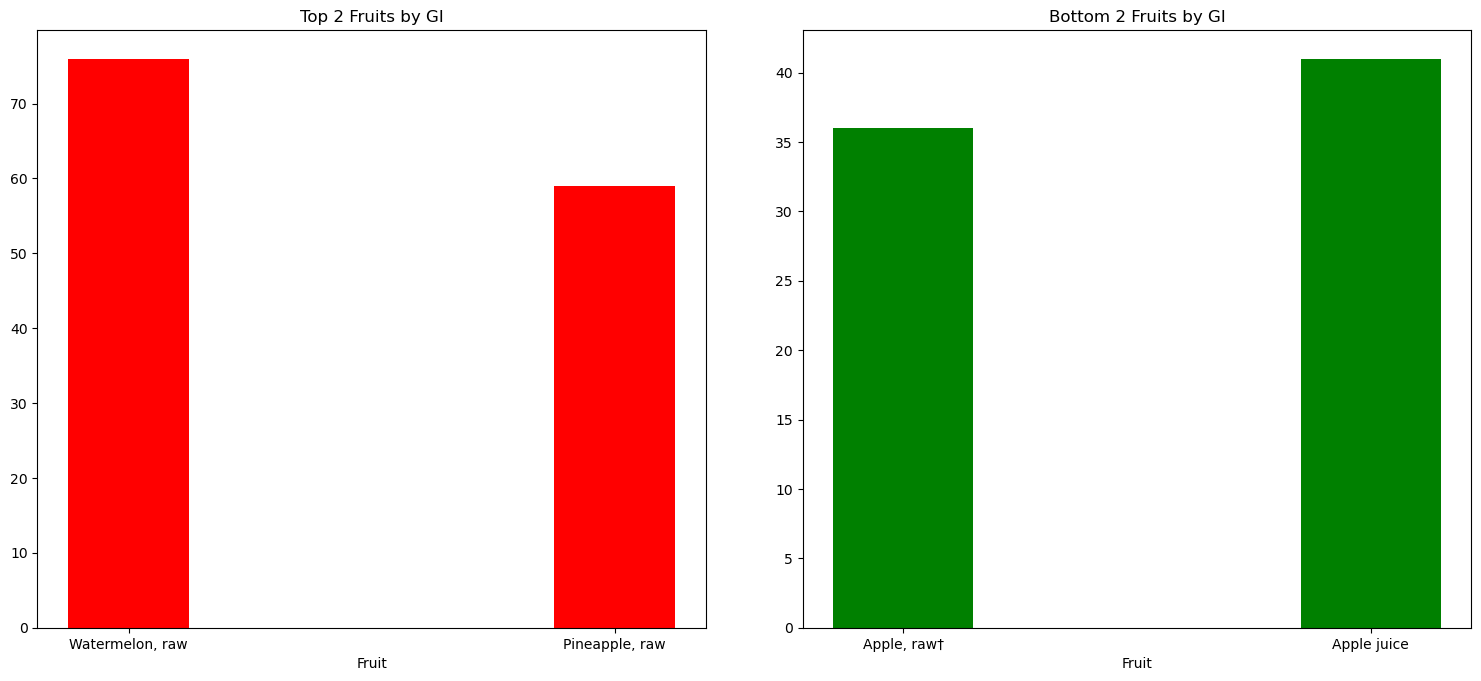

In [152]:


# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(
    16, 8), subplot_kw={'sharey': True})

# Plot top two fruits
axs[0].bar(top_2_fruits['Food'], top_2_fruits['gi'], color='red', width=0.25)
axs[0].set_title('Top 2 Fruits by GI')
axs[0].set_xlabel('Fruit')

# Plot bottom two fruits
axs[1].bar(bottom_2_fruits['Food'], bottom_2_fruits['gi'],
           color='green', width=0.3)
axs[1].set_title('Bottom 2 Fruits by GI')
axs[1].set_xlabel('Fruit')


# Adjust layout and spacing
fig.tight_layout(pad=5.0)

# Show plot
plt.show()

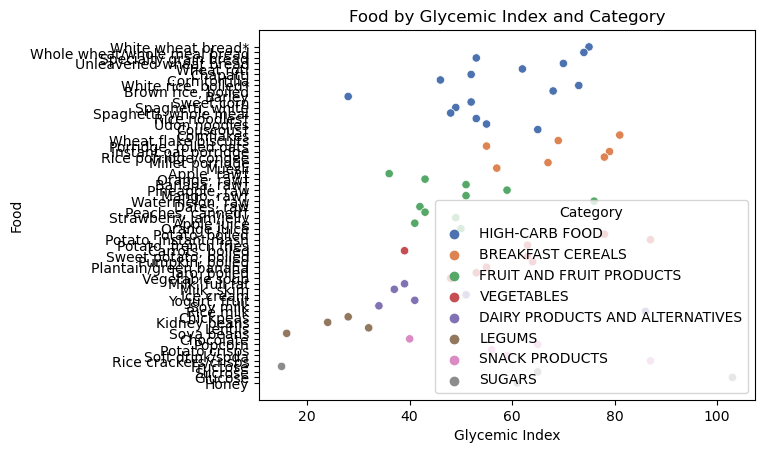

<Figure size 800x1200 with 0 Axes>

In [170]:
# Create scatter plot using Seaborn


sns.scatterplot(x='gi', y='Food', hue='Category',
                data=df, palette='deep', sizes=(40, 400))

# Add title and labels
plt.title('Food by Glycemic Index and Category')
plt.xlabel('Glycemic Index')
plt.ylabel('Food')

# Set figure size and adjust spacing
plt.figure(figsize=(8, 12))
plt.subplots_adjust(left=0.2)


# Show the plot
plt.show()

In [194]:
# find the Categories mentioned in the column  "Category "
categories = df['Category'].unique()


8

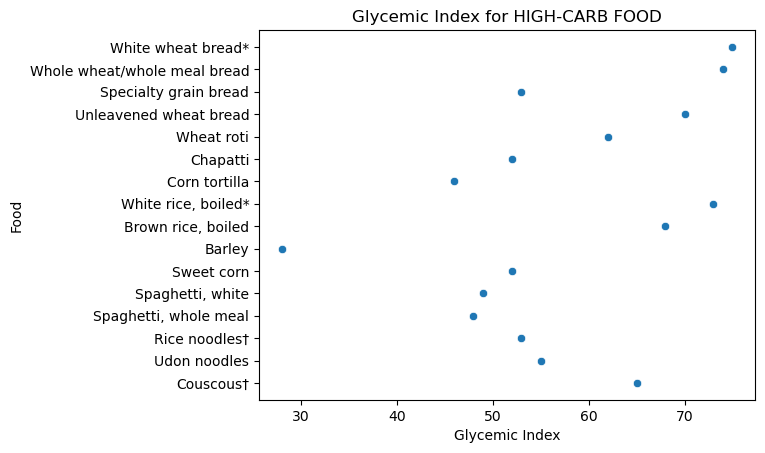

<Figure size 300x900 with 0 Axes>

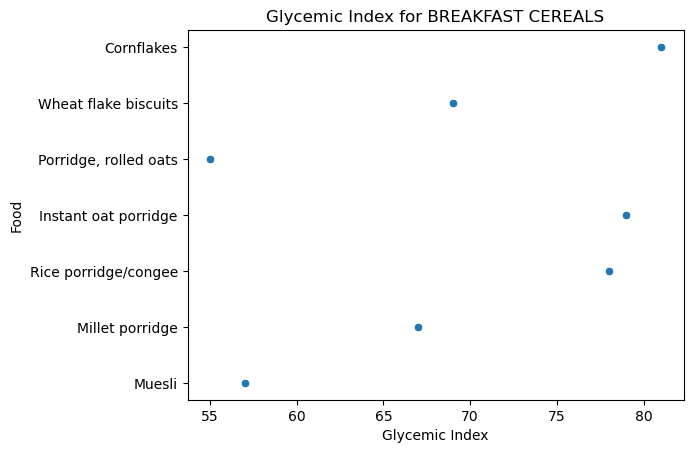

<Figure size 300x900 with 0 Axes>

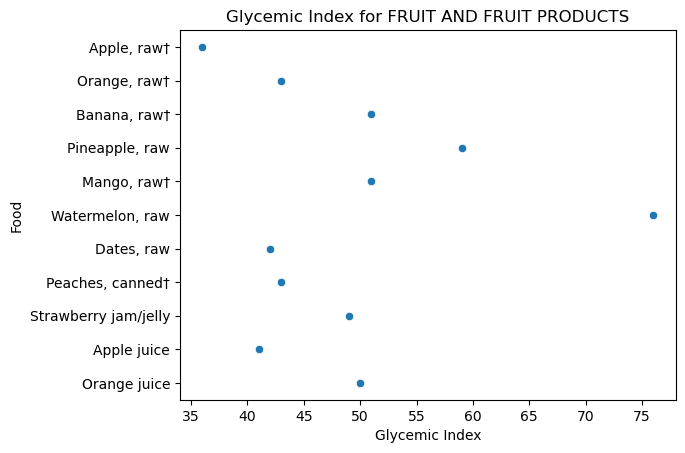

<Figure size 300x900 with 0 Axes>

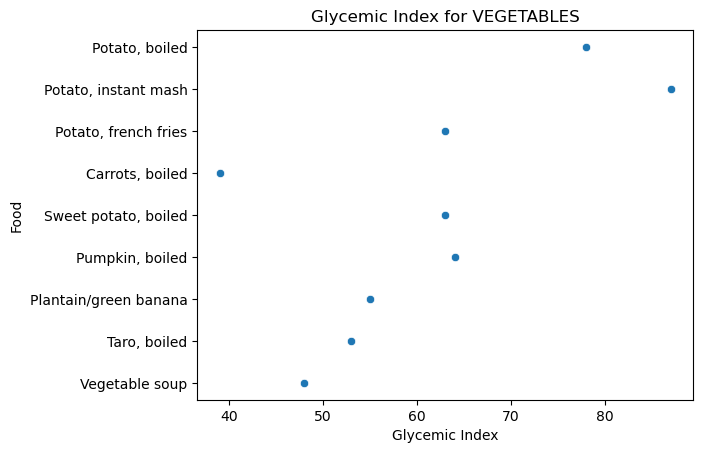

<Figure size 300x900 with 0 Axes>

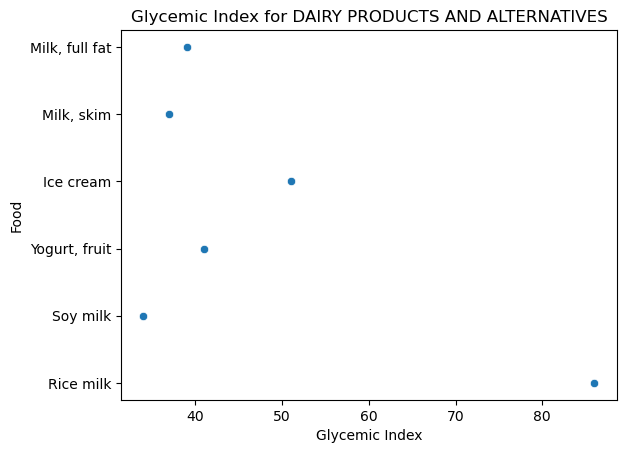

<Figure size 300x900 with 0 Axes>

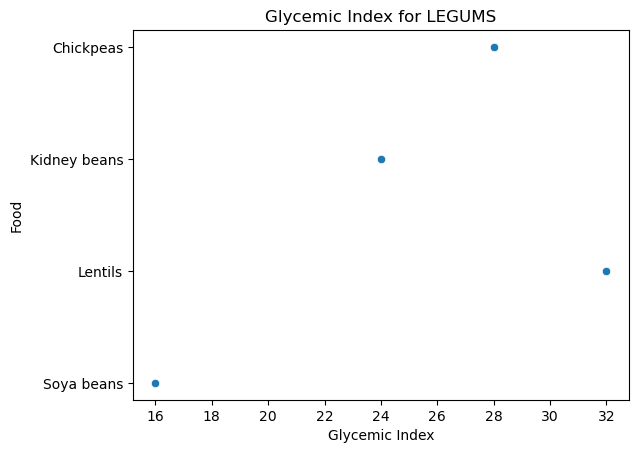

<Figure size 300x900 with 0 Axes>

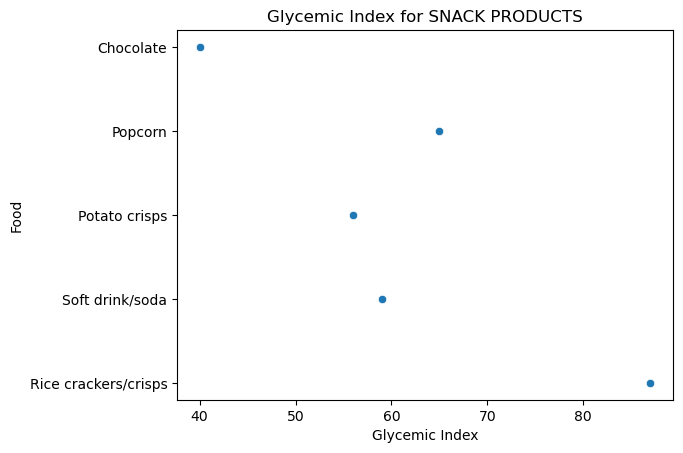

<Figure size 300x900 with 0 Axes>

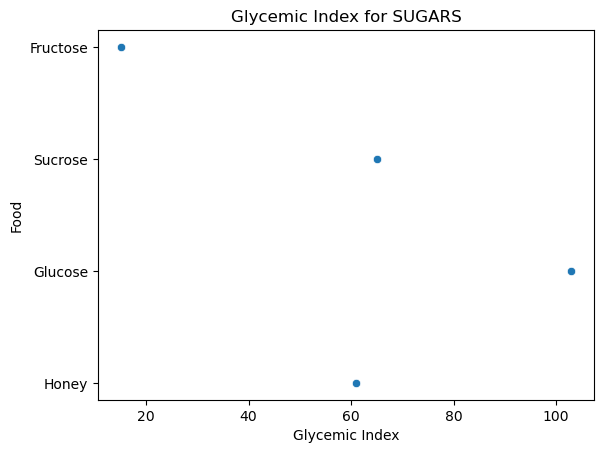

<Figure size 300x900 with 0 Axes>

In [196]:

# Since one scatter plot is too congested , create scatterplot for each category by iterating over the categories 
for category in categories:

    df_category = df[df['Category'] == category] # pass the category name for creating dedicated df

    sns.scatterplot(x='gi', y='Food', data=df_category, sizes=(40, 400)) # pass this df to seaborn to create scatterplot

    # Add title and labels
    plt.title(f'Glycemic Index for {category}')
    plt.xlabel('Glycemic Index')
    plt.ylabel('Food')

    # Set figure size and adjust spacing
    plt.figure(figsize=(3, 9))
    plt.subplots_adjust(left=0.5)

    # Show the plot
    plt.show()

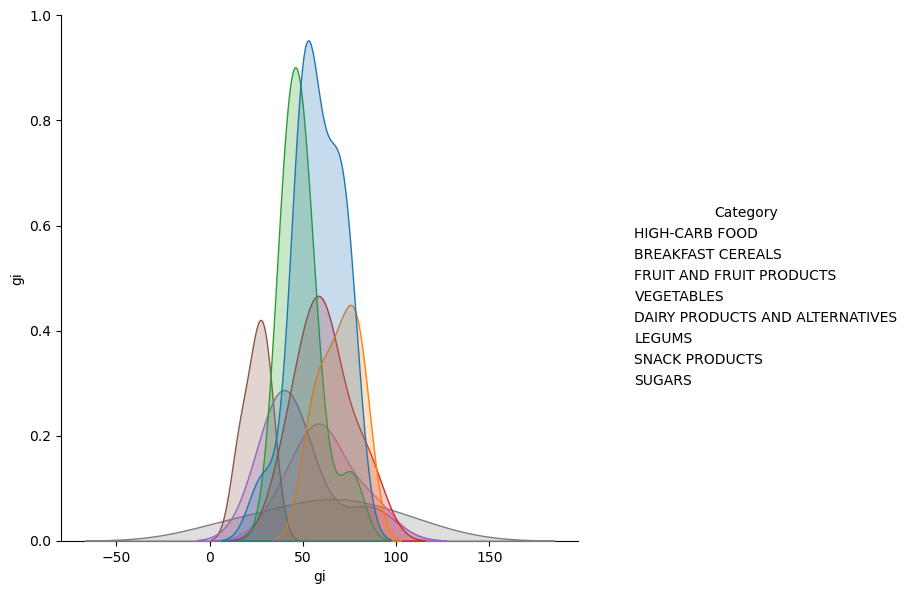

In [205]:
sns.pairplot(data=df, hue="Category", kind={'kde'}, height=6)